# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the Book Review dataset. I will be predicting whether a book review is positive or not, and the label is the Positive Review column. This is a supervised learning problem and a binary classification task. The only feature is the text from the Review column. This problem is important because companies can use predictions to automatically analyze customer feedback and save time. It also helps improve decision-making and gives businesses better insights into customer satisfaction and needs.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Dataset shape: (1973, 2)

Column types:
Review             object
Positive Review      bool
dtype: object

Missing values:
Review             0
Positive Review    0
dtype: int64

Class distribution:
False    993
True     980
Name: Positive Review, dtype: int64


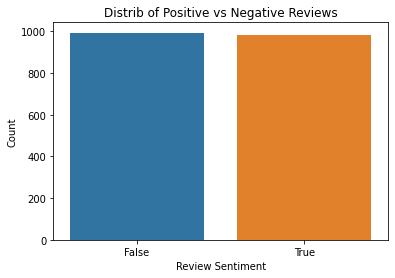

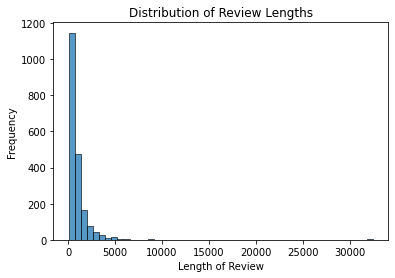


Sample reviews:
759     I forced myself to finish this book before I r...
297     Truly the author's pen is mightier than the sw...
1421    Terry's son, Nile, has honored his father (and...
350     Painstakingly compiled by Judy Brown (contribu...
1103    For the first quarter of the book, I thought E...
Name: Review, dtype: object


In [3]:
# YOUR CODE HERE
print("Dataset shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['Positive Review'].value_counts())

sns.countplot(x='Positive Review', data=df)
plt.title('Distrib of Positive vs Negative Reviews')
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.show()

df['review_length'] = df['Review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

print("\nSample reviews:")
print(df['Review'].sample(5, random_state=42))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I kept the Review column as my feature and the Positive Review column as the label. There were no missing values. I cleaned the text data and used TF-IDF vectorization to convert the reviews into numbers. I added dropout layers to reduce overfitting. I chose a neural network model for this task. I trained the model, adjusted the number of epochs, and checked its accuracy to improve performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
import os
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# load the dataset
data_path = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(data_path)

# clean the text by removing punctuation, numbers, and converting to lowercase
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['Review'] = df['Review'].apply(clean_text)

# set features and labels
X = df['Review']
y = df['Positive Review']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(
    max_features=8000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# build a more expressive neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# add early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# train the model
history = model.fit(
    X_train_tfidf.toarray(), y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# evaluate on test set
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# predict and show performance report
y_pred_probs = model.predict(X_test_tfidf.toarray())
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))


Epoch 1/50
40/40 [==============================] - 1s 14ms/step - loss: 0.6880 - accuracy: 0.5254 - val_loss: 0.6850 - val_accuracy: 0.4715
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6454 - accuracy: 0.6022 - val_loss: 0.6405 - val_accuracy: 0.6171
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.5255 - accuracy: 0.8225 - val_loss: 0.5663 - val_accuracy: 0.6835
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.9200 - val_loss: 0.5030 - val_accuracy: 0.7563
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2095 - accuracy: 0.9620 - val_loss: 0.4730 - val_accuracy: 0.7753
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1176 - accuracy: 0.9865 - val_loss: 0.4604 - val_accuracy: 0.7816
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0684 - accuracy: 0.9937 - val_loss: 0.4643 - val_accuracy: 0.8006
Epoch 8/50
40/40 [=

In [5]:
# YOUR CODE HERE